# Lec 21 : Decision Trees

In [16]:
import seaborn as sns
import pandas as pd
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# set numpy random seed so that this notebook is deterministic
np.random.seed(23)

## Decision Tree Classification

In [17]:
iris_data = pd.read_csv("iris.csv")
iris_data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
139,6.9,3.1,5.4,2.1,virginica
125,7.2,3.2,6.0,1.8,virginica
67,5.8,2.7,4.1,1.0,versicolor
3,4.6,3.1,1.5,0.2,setosa
113,5.7,2.5,5.0,2.0,virginica


In [23]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier(criterion ='entropy')
decision_tree_model = decision_tree_model.fit(iris_data[["petal_length", "petal_width"]], iris_data["species"])

In [19]:
four_random_rows = iris_data.sample(4)
four_random_rows

,sepal_length,sepal_width,petal_length,petal_width,species
148,6.2,3.4,5.4,2.3,virginica
64,5.6,2.9,3.6,1.3,versicolor
137,6.4,3.1,5.5,1.8,virginica
14,5.8,4.0,1.2,0.2,setosa


In [24]:
decision_tree_model.predict(four_random_rows[["petal_length", "petal_width"]])

array(['virginica', 'versicolor', 'virginica', 'setosa'], dtype=object)

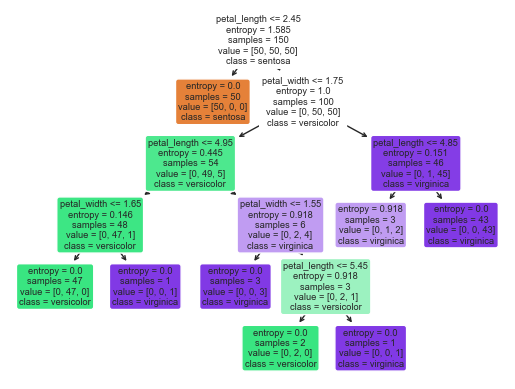

In [25]:
tree.plot_tree(decision_tree_model, feature_names = ["petal_length", "petal_width"],
              class_names = ["sentosa","versicolor","virginica"],
              rounded = True, filled = True);

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


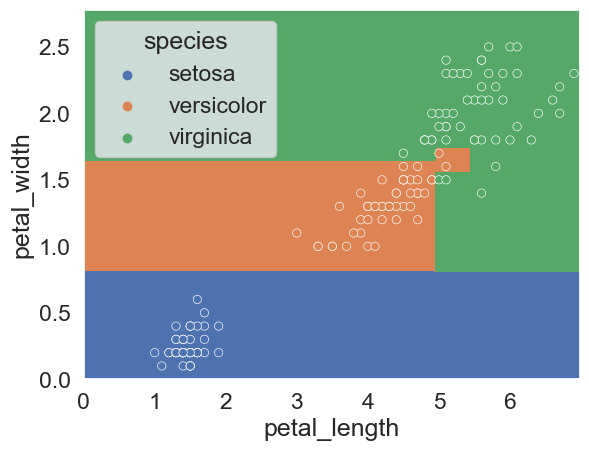

In [21]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species");
#fig = plt.gcf()
#fig.savefig("iris_decision_boundaries.png", dpi=300, bbox_inches = "tight")

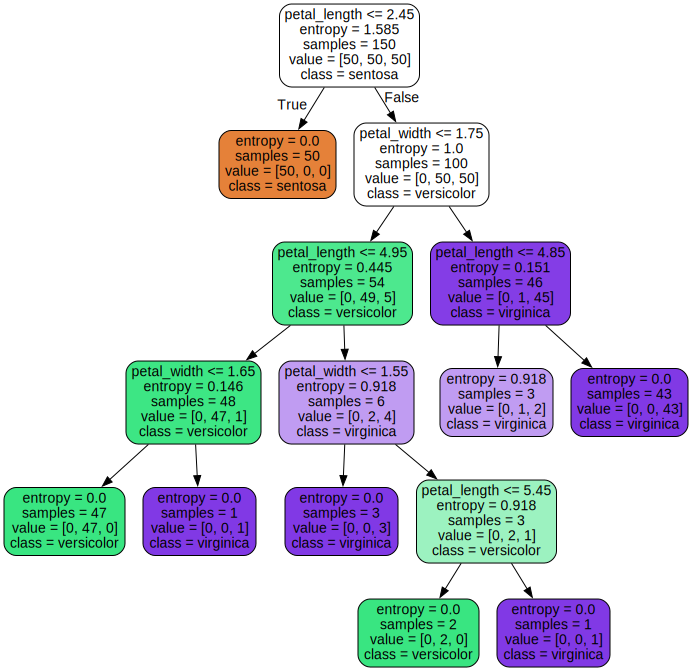

In [30]:
import graphviz
#pip install graphviz
#brew install graphviz
dot_data = tree.export_graphviz(decision_tree_model, out_file = None,
                                feature_names = ["petal_length", "petal_width"],
                                class_names = ["sentosa","versicolor","virginica"],
                                filled = True, rounded = True)
graph = graphviz.Source(dot_data)
graph.render(format = "png", filename = "iris_tree")
graph


In [9]:
from sklearn.metrics import accuracy_score
predictions = decision_tree_model.predict(iris_data[["petal_length", "petal_width"]])
accuracy_score(predictions, iris_data["species"])

0.9933333333333333

In [29]:
iris_data.query("petal_length > 2.45 and petal_width > 1.75 and petal_length< 4.85")


,sepal_length,sepal_width,petal_length,petal_width,species
70,5.9,3.2,4.8,1.8,versicolor
126,6.2,2.8,4.8,1.8,virginica
138,6.0,3.0,4.8,1.8,virginica


## Overfitting

In [6]:
np.split?

In [31]:
train_iris_data, test_iris_data = np.split(iris_data.sample(frac=1), [110])

In [32]:
train_iris_data = train_iris_data.sort_values(by="species")
test_iris_data = test_iris_data.sort_values(by="species")

In [33]:
len(train_iris_data)

110

In [34]:
train_iris_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
26,5.0,3.4,1.6,0.4,setosa
15,5.7,4.4,1.5,0.4,setosa
16,5.4,3.9,1.3,0.4,setosa
37,4.9,3.1,1.5,0.1,setosa
34,4.9,3.1,1.5,0.1,setosa


In [35]:
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model = decision_tree_model.fit(train_iris_data[["petal_length", "petal_width"]], train_iris_data["species"])

In [36]:
train_predictions = decision_tree_model.predict(train_iris_data[["petal_length", "petal_width"]])
accuracy_score(train_predictions, train_iris_data["species"])

0.990909090909091

In [37]:
# Accuracy score on test set
test_predictions = decision_tree_model.predict(test_iris_data[["petal_length", "petal_width"]])
accuracy_score(test_predictions, test_iris_data["species"])

0.975